<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_4/Chapter4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import (
    LinearRegression, 
    SGDRegressor, 
    Ridge, 
    Lasso, 
    ElasticNet, 
    LogisticRegression
  )
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.base import clone
from sklearn import datasets

# Linear Regression

## Using Normal Equation

$\hat{\theta} = (X^TX)^{-1}X^Ty$

In [3]:
# Data
np.random.seed(0)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Adding Bias term
X_b = np.c_[np.ones((100, 1)), X]

# Normal Equation
theta_best = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T), y)
theta_best

array([[4.22215108],
       [2.96846751]])

**Predictions**

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = np.dot(X_new_b, theta_best)
y_predict

array([[ 4.22215108],
       [10.1590861 ]])

**Plot Predictions**

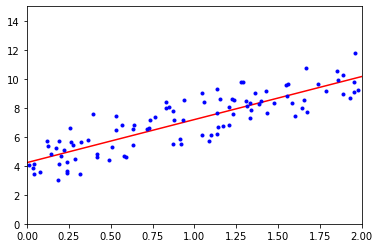

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Using Sklearn

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([4.22215108]), array([[2.96846751]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.22215108],
       [10.1590861 ]])

## Using lstsq function

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.22215108],
       [2.96846751]])

## Using Psuedo-Inverse function

In [12]:
np.dot(np.linalg.pinv(X_b), y)

array([[4.22215108],
       [2.96846751]])

## Using Batch Gradient Descent

In [14]:
eta = 0.1
n_iterations = 1000
m = 100                 # No. of training samples

theta_gd = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradients = (2/m) * np.dot(X_b.T, (np.dot(X_b, theta_gd) - y))
  theta_gd = theta_gd - eta*gradients

theta_gd

array([[4.22215108],
       [2.96846751]])

## Using Stochastic Gradient Descent

**Manually**

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    
    theta = theta - eta * gradients

theta

array([[4.23542377],
       [2.97892243]])

**Sklearn**

In [17]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25385345]), array([3.05053107]))

## Using Mini-batch Gradient Descent

In [24]:
n_epochs = 50
m = 100
batch_size = 10
batches = m//batch_size
eta = 0.01
# t0, t1 = 5, 50 # learning schedule hyperparameters


# def learning_schedule(t):
  # return t0 / (t + t1)

theta_gd = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(batches):
    # random_indexes = np.random.choice(np.arange(100), size=batches)
    xi = X_b[(i*batch_size) : ((i+1)*batch_size)]
    yi = y[(i*batch_size) : ((i+1)*batch_size)]
    
    gradients = 2 * xi.T.dot(xi.dot(theta_gd) - yi)
    # eta = learning_schedule(epoch * m + i)
    
    theta_gd = theta_gd - eta * gradients

theta_gd

array([[4.10354361],
       [2.87184491]])

# Polynomial Regression

**Data**

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

**Polynomial Features**

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.96345724]), array([2.96345724, 8.7820788 ]))

**Polynomial Regression**

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93361427]), array([[1.01019011, 0.49773111]]))

**Visualization**

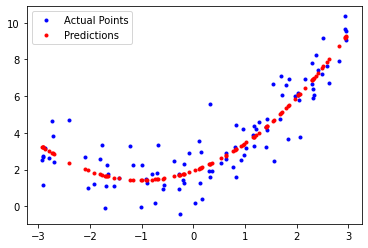

In [33]:
plt.plot(X, y, "b.", label="Actual Points")
plt.plot(X, lin_reg.predict(X_poly), "r.", label="Predictions")
plt.legend()
plt.show()

# Learning Curves

In [43]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    
    train_preds = model.predict(X_train[:m])
    val_preds = model.predict(X_val)

    train_errors.append(
        mean_squared_error(
            y_true=y_train[:m], 
            y_pred=train_preds
          )
      )

    val_errors.append(
        mean_squared_error(
            y_true=y_val, 
            y_pred=val_preds
          )
      )
  
  plt.figure(figsize=(8, 5))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  
  plt.ylim([0, 3])

  plt.xlabel("Training Data Size", size=15)
  plt.ylabel("RMSE", size=15)
  plt.title("Learning Curves", size=20)
  
  plt.legend()
  plt.show()

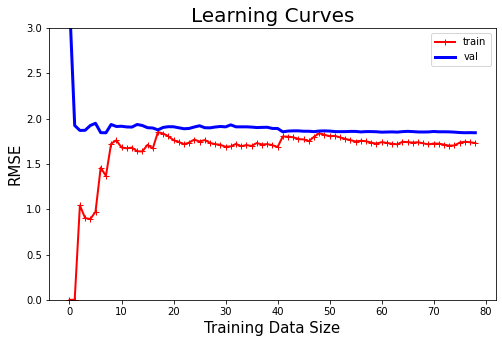

In [44]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

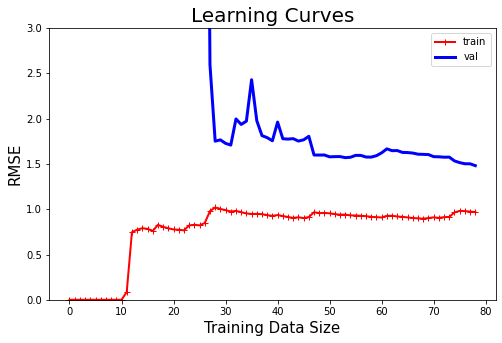

In [45]:
polynomial_regression = Pipeline(
                    [(
                        "poly_features", 
                        PolynomialFeatures(
                            degree=10, 
                            include_bias=False
                          )
                     ), 
                     (
                        "lin_reg", 
                        LinearRegression()
                     )]
                  )
plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models

## Ridge Regression

**Sklearn close form solution**

$\hat{\theta} = (X^TX + \alpha A)^{-1}X^Ty$

In [49]:
ridge_reg = Ridge(alpha=1.0, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.98071886]])

**SGD**

In [51]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.97683842])

## Lasso Regression

**Sklearn**

In [53]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.94396242])

**SGD**

In [54]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.96240678])

## Elastic Net

In [56]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.62772358])

## Early Stopping

In [63]:
# prepare the data
poly_scaler = Pipeline(
    [(
        "poly_features", 
        PolynomialFeatures(
            degree=90, 
            include_bias=False
          )
     ),
     (
        "std_scaler", 
        StandardScaler()
      )]
  )

X_train, X_val, y_train, y_val = train_test_split(
                                                  X, y, 
                                                  test_size=0.2, 
                                                  random_state=42
                                                )

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1, tol=-np.infty, warm_start=True,
    penalty=None, learning_rate="constant", eta0=0.0005
  )

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [64]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

# Logistic Regression

## Data

In [67]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [68]:
X = iris["data"][:, 3:] # petal width

In [69]:
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

## Model

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

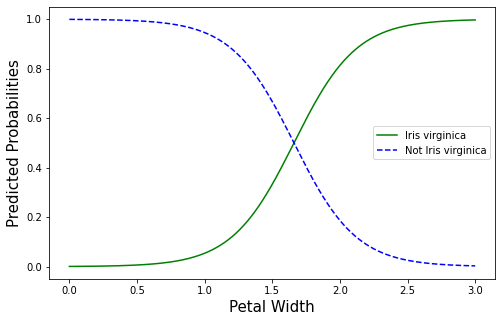

In [74]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(8, 5))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

plt.xlabel("Petal Width", size=15)
plt.ylabel("Predicted Probabilities", size=15)

plt.legend()
plt.show()

In [73]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# Softmax Regression

In [75]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"] 

softmax_reg = LogisticRegression(
    multi_class="multinomial", 
    solver="lbfgs",
    C=10
  )
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
softmax_reg.predict([[5, 2]])

array([2])

In [77]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])